In [23]:
# 1. Import Library yang Dibutuhkan

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [24]:
# 2. Membaca Dataset

# Dataset disimpan dalam file CSV bernama "dataset_kualitas_kopi.csv"
df = pd.read_csv("dataset_kualitas_kopi.csv")

# Cek jumlah baris dan kolom
print(df.shape)

# Cek nama kolom
print(df.columns)

# Cek tipe data tiap kolom
print(df.dtypes)

# Informasi ringkas tentang dataset
print(df.info())

# Statistik deskriptif (khusus untuk kolom numerik)
print(df.describe())

# Distribusi kategori "Jenis Proses"
print(df["Jenis Proses"].value_counts())

# Distribusi target "Kualitas Kopi"
print(df["Kualitas Kopi"].value_counts())

# Lihat 5 data teratas
print(df.head())

# Lihat 5 data terbawah
print(df.tail())

(300, 4)
Index(['Kadar Kafein', 'Tingkat Keasaman', 'Jenis Proses', 'Kualitas Kopi'], dtype='object')
Kadar Kafein        float64
Tingkat Keasaman    float64
Jenis Proses         object
Kualitas Kopi        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kadar Kafein      300 non-null    float64
 1   Tingkat Keasaman  300 non-null    float64
 2   Jenis Proses      300 non-null    object 
 3   Kualitas Kopi     300 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB
None
       Kadar Kafein  Tingkat Keasaman
count    300.000000        300.000000
mean      94.880478          5.255010
std       18.612343          0.423348
min       60.340609          4.505419
25%       80.885090          4.912739
50%       96.469407          5.249464
75%      108.570401          5.622462
max      129.569514      

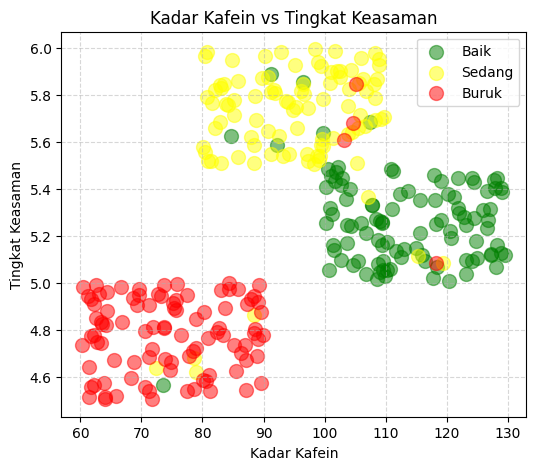

In [25]:
# 3. Visualisasi Data

# Pisahkan data berdasarkan kualitas kopi
baik = df[df["Kualitas Kopi"]=="Baik"]
sedang = df[df["Kualitas Kopi"]=="Sedang"]
buruk = df[df["Kualitas Kopi"]=="Buruk"]

# Scatter plot: Kadar Kafein vs Tingkat Keasaman
plt.figure(figsize=(6,5))
plt.scatter(baik["Kadar Kafein"], baik["Tingkat Keasaman"],
            s=100, alpha=0.5, color="green", label="Baik")
plt.scatter(sedang["Kadar Kafein"], sedang["Tingkat Keasaman"],
            s=100, alpha=0.5, color="yellow", label="Sedang")
plt.scatter(buruk["Kadar Kafein"], buruk["Tingkat Keasaman"],
            s=100, alpha=0.5, color="red", label="Buruk")

plt.xlabel("Kadar Kafein")
plt.ylabel("Tingkat Keasaman")
plt.title("Kadar Kafein vs Tingkat Keasaman")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [26]:
# 4. Persiapan Data untuk Machine Learning

# Fitur (X) = Kadar Kafein, Tingkat Keasaman, Jenis Proses
# Target (y) = Kualitas Kopi
X = df[["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"]]
y = df["Kualitas Kopi"]

# Bagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tentukan kolom numerik dan kategorikal
numeric_columns = ["Kadar Kafein", "Tingkat Keasaman"]
categorical_columns = ["Jenis Proses"]

# Preprocessing:
# - Standarisasi fitur numerik (StandardScaler)
# - OneHotEncoding fitur kategorikal (Jenis Proses)
preprocessing = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), numeric_columns),
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
])

In [27]:
# 5. Membuat Pipeline Model

# Pipeline: Preprocessing + Logistic Regression
model = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", LogisticRegression(max_iter=1000))
])

# Latih model menggunakan data train
model.fit(X_train, y_train)

# Lakukan prediksi di data test
y_pred = model.predict(X_test)

# Hitung akurasi
print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 0.9666666666666667


In [28]:
# 6. Prediksi Data Baru

# Contoh data baru: Kadar Kafein=90, Keasaman=5, Jenis Proses=Honey
data_baru = pd.DataFrame([[90, 5, "Honey"]],
                         columns=["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])

# Prediksi kualitas kopi
prediksi = model.predict(data_baru)[0]

# Hitung probabilitas keyakinan model
presentase = max(model.predict_proba(data_baru)[0])

print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi Buruk dengan tingkat keyakinan 72.66%


In [30]:
# 7. Simpan Model

# Model sudah termasuk scaler + encoder, cukup disimpan jadi 1 file
joblib.dump(model, "model_klasifikasi_kualitas_kopi.joblib")

['model_klasifikasi_kualitas_kopi.joblib']